In [0]:
!apt-get install graphviz libgraphviz-dev
!pip install git+https://github.com/superbobry/rcviz

Reading package lists... Done
Building dependency tree       
Reading state information... Done
graphviz is already the newest version (2.40.1-2).
libgraphviz-dev is already the newest version (2.40.1-2).
0 upgraded, 0 newly installed, 0 to remove and 8 not upgraded.
  Cloning https://github.com/superbobry/rcviz to /tmp/pip-req-build-y5fle5ah
  Running command git clone -q https://github.com/superbobry/rcviz /tmp/pip-req-build-y5fle5ah
  Created wheel for rcviz: filename=rcviz-0.1-cp36-none-any.whl size=2484 sha256=119e5a49d4285645ebfdd80c9b4a5353f58dde82255b45d9697bec5d670f013f
  Stored in directory: /tmp/pip-ephem-wheel-cache-oyg0dcrv/wheels/3c/b6/42/5dff61569b127dd87d4d1605da672d0552ca8dd19029b42091
Successfully built rcviz


# First try with Fibonacci numbers

In [0]:
import matplotlib.pyplot as plt
import numpy as np
from PIL import Image
%matplotlib inline

In [0]:
#helper time function
import time
def timed(f,*args,n_iter=100):
  acc = float('inf')
  for i in range(n_iter):
    t0=time.perf_counter()
    f(*args)
    t1=time.perf_counter()
    acc = min(acc,t1-t0)
  return acc

In [0]:
def compare(fs, args):
  for f in fs:
    plt.plot(args, [timed(f, arg) for arg in args], label = f.__name__)
    plt.legend()

## Here you need to implement recursive Fibonacci function (just by definition)

In [0]:
def fib1(n):
  assert n>=0
  return n if n<=1 else fib1(n-1)+fib1(n-2)

In [0]:
from rcviz import viz

fib1=viz(fib1)

In [0]:
fib1(5)

rendered to fib1.png


/usr/local/lib/python3.6/dist-packages/pygraphviz/agraph.py:1367: RuntimeWarning: Warning: flat edge between adjacent nodes one of which has a record shape - replace records with HTML-like labels
  Edge 63327640 -> 63027480
Error: lost 63327064 63329368 edge
Error: lost 43063448 63025176 edge
Error: lost 63327640 63027480 edge
Error: lost 43047128 63022104 edge
Error: lost 63025944 63275480 edge
Error: lost 63328792 43066136 edge
Error: lost 63279512 63037336 edge

  warnings.warn(b"".join(errors).decode(self.encoding), RuntimeWarning)


5

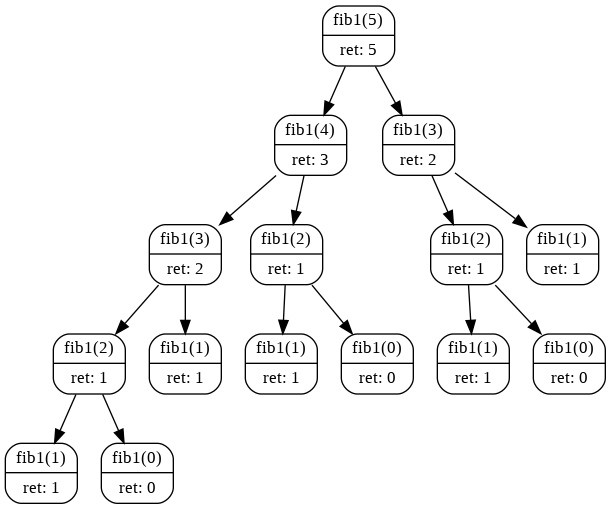

In [0]:
Image.open('fib1.png')

## Here you need to implement non-recursive version

Use pre-computed numbers

In [0]:
def fib2(n):
    assert n>=0
    f0,f1=0,1
    for i in range(n-1):
      f0,f1 = f1,f0+f1
    return f1

In [0]:
fib2=viz(fib2)

In [0]:
fib2(5)

5

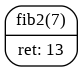

In [0]:
Image.open('fib2.png')

## Compare speed with the helper function provided (called compare)

Compare time for 7 number with the timed function and plot graph with the compare function

In [0]:
timed(fib1, 5 )

2.5870003810268827e-06

In [0]:
timed(fib2, 5)

7.699991328991018e-07

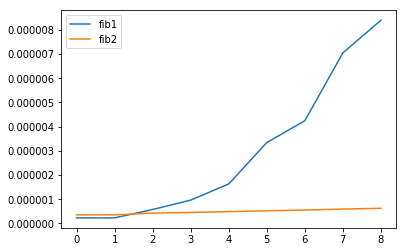

In [0]:
compare([fib1,fib2], list(range(9)))